In [9]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load CSV
df = pd.read_csv("selected_features_dataset.csv")

In [10]:
# Columns in your data: source_city, destination_city, is_cutoff, data (categorical)
label_cols = ['source_city', 'destination_city', 'is_cutoff', 'data']
for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [11]:
# Define features and target
X = df.drop(columns=['segment_actual_time'])
y = df['segment_actual_time']

In [12]:
# Split based on 'data' column (as in final Ridge file)
X_train = X[df['data'] == 1].drop(columns=['data'])
X_test = X[df['data'] == 0].drop(columns=['data'])
y_train = y[df['data'] == 1]
y_test = y[df['data'] == 0]

In [13]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
# Evaluation function
def evaluate_model(y_true, y_pred, model_name):
    return {
        "Model": model_name,
        "R2 Score": round(r2_score(y_true, y_pred), 4),
        "RMSE": round(np.sqrt(mean_squared_error(y_true, y_pred)), 4),
        "MAE": round(mean_absolute_error(y_true, y_pred), 4)
    }


In [15]:

# Train and evaluate all models
results = []

ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
results.append(evaluate_model(y_test, ridge.predict(X_test_scaled), "Ridge Regression"))

lasso = Lasso(alpha=0.1)
lasso.fit(X_train_scaled, y_train)
results.append(evaluate_model(y_test, lasso.predict(X_test_scaled), "Lasso Regression"))

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
results.append(evaluate_model(y_test, elastic.predict(X_test_scaled), "ElasticNet Regression"))

# Display comparison table
pd.DataFrame(results)

,Model,R2 Score,RMSE,MAE
0,Ridge Regression,0.4282,0.7046,0.2100
1,Lasso Regression,0.3832,0.7318,0.2204
2,ElasticNet Regression,0.4006,0.7214,0.2143


C:\Users\Devendra Garwa\AppData\Local\Temp\ipykernel_22108\1538310046.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="R2 Score", palette="Blues_d")
C:\Users\Devendra Garwa\AppData\Local\Temp\ipykernel_22108\1538310046.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="RMSE", palette="Oranges_d")
C:\Users\Devendra Garwa\AppData\Local\Temp\ipykernel_22108\1538310046.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_results, x="Model", y="MAE", palette="Greens_d")


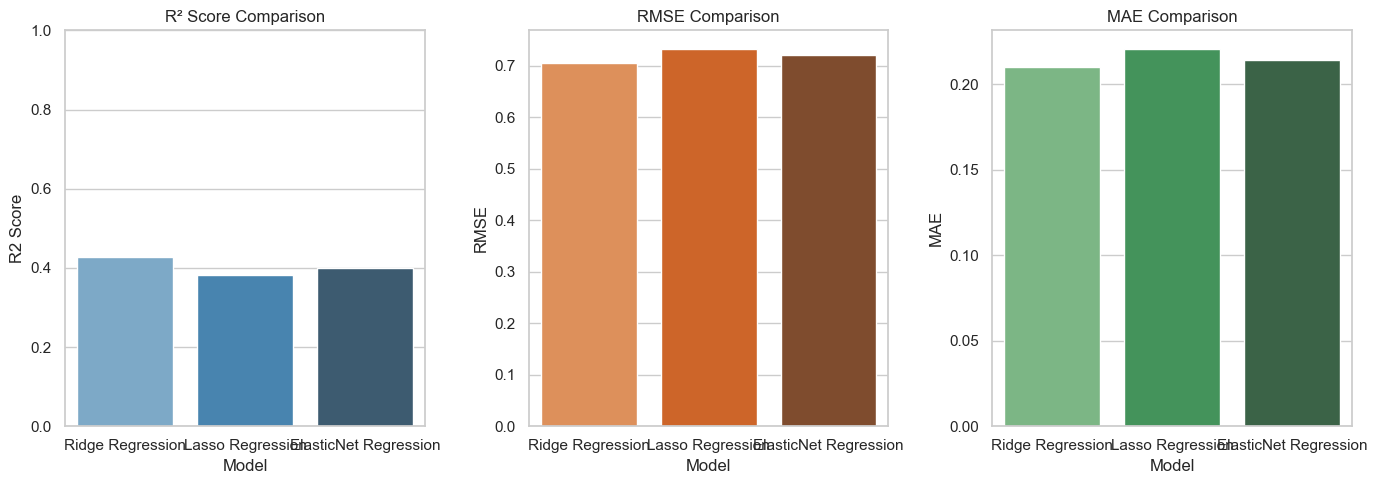

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Model evaluation results
results = [
    {"Model": "Ridge Regression", "R2 Score": 0.4282, "RMSE": 0.7046, "MAE": 0.2100},
    {"Model": "Lasso Regression", "R2 Score": 0.3832, "RMSE": 0.7318, "MAE": 0.2204},
    {"Model": "ElasticNet Regression", "R2 Score": 0.4006, "RMSE": 0.7214, "MAE": 0.2143}
]

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Set plot style
sns.set(style="whitegrid")
plt.figure(figsize=(14, 5))

# Plot R²
plt.subplot(1, 3, 1)
sns.barplot(data=df_results, x="Model", y="R2 Score", palette="Blues_d")
plt.title("R² Score Comparison")
plt.ylim(0, 1)

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(data=df_results, x="Model", y="RMSE", palette="Oranges_d")
plt.title("RMSE Comparison")

# Plot MAE
plt.subplot(1, 3, 3)
sns.barplot(data=df_results, x="Model", y="MAE", palette="Greens_d")
plt.title("MAE Comparison")

plt.tight_layout()
plt.show()
